# Content Based Recommendation System

### Importing dependencies

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading ratings file
# Ignore the timestamp column
ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])

# Reading users file
users = pd.read_csv('users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [36]:
display(movies.head())
display(movies.shape)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


(3883, 3)

### Visualizing the words of movies to get a context of the data set

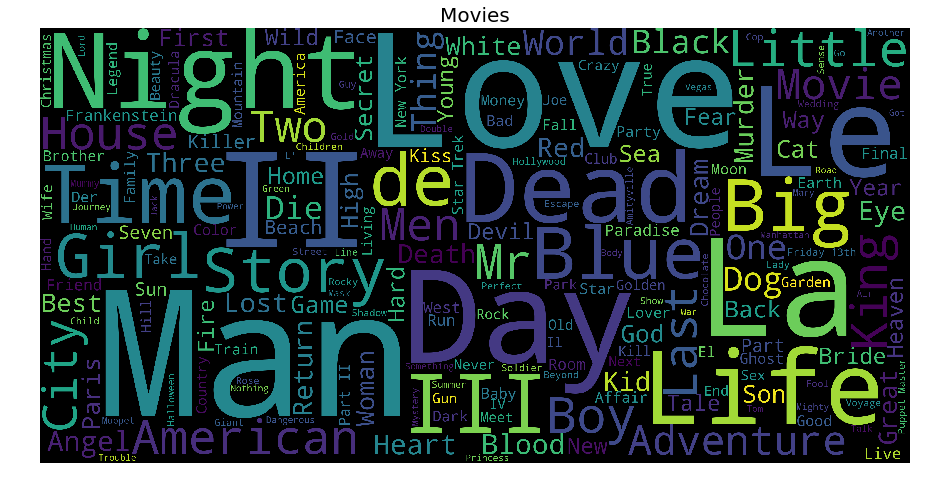

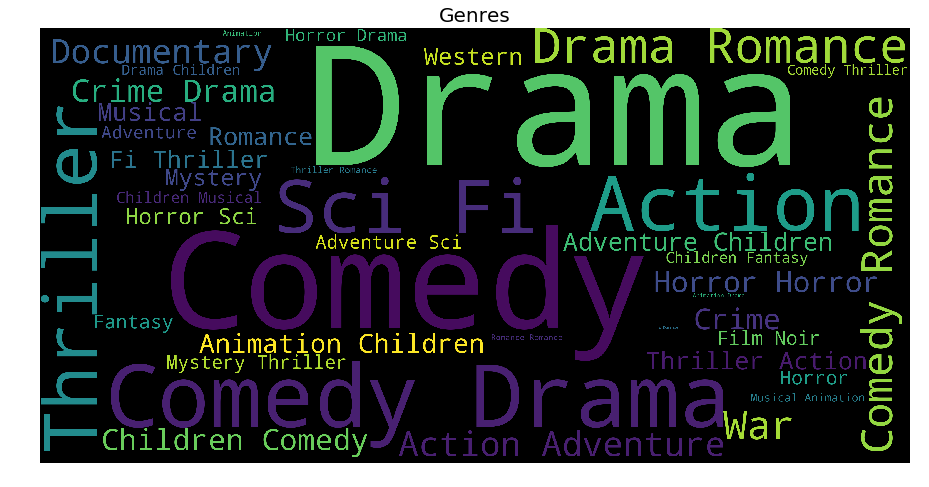

In [37]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

genres = movies['genres'].str.replace('|',' ')
genres_corpus = ' '.join(genres.fillna(' ').astype(str))
genres_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(genres_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title("Movies", size = 20)
plt.show()

plt.figure(figsize=(16,8))
plt.imshow(genres_wordcloud)
plt.axis('off')
plt.title("Genres", size = 20)
plt.show()

### Converting the attached genre names to arrays

In [38]:
movies['genres'] = movies['genres'].str.split('|')
# Convert genres to string value
movies['genres'] = movies['genres'].fillna("").astype('str')

### Using TfidfVectorizer to convert the array of genres to seperate columns

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(3883, 127)

### Finding the cosine similarity between the records and creating an matrix

In [40]:
# from sklearn.metrics.pairwise import cosine_similarity
# sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
# display(sim[:4, :4])

from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
display(sim[:4, :4])

array([[1.        , 0.14193614, 0.09010857, 0.1056164 ],
       [0.14193614, 1.        , 0.        , 0.        ],
       [0.09010857, 0.        , 1.        , 0.1719888 ],
       [0.1056164 , 0.        , 0.1719888 , 1.        ]])

### Naming the colums and indexes for knowing which movie the realtions belongs to

In [41]:
result = pd.DataFrame(data = sim, columns = movies['title'], index = movies['title'])

In [42]:
result.head(3)

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Bamboozled (2000),Bootmen (2000),Digimon: The Movie (2000),Get Carter (2000),Get Carter (1971),Meet the Parents (2000),Requiem for a Dream (2000),Tigerland (2000),Two Family House (2000),"Contender, The (2000)"
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.141936,0.090109,0.105616,0.235233,0.0,0.090109,0.209844,0.0,0.000000,...,0.235233,0.105616,0.590521,0.0,0.0,0.235233,0.0,0.0,0.0,0.0
Jumanji (1995),0.141936,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.676388,0.0,0.126079,...,0.000000,0.000000,0.237492,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Grumpier Old Men (1995),0.090109,0.000000,1.000000,0.171989,0.383061,0.0,1.000000,0.000000,0.0,0.000000,...,0.383061,0.171989,0.000000,0.0,0.0,0.383061,0.0,0.0,0.0,0.0


### Creating a function to find most related movies

In [43]:
def recommend(movie):
    from IPython.core.display import HTML
    display(HTML(pd.DataFrame(result[movie].sort_values(ascending = False).head()).to_html()))

### Single movie example

In [44]:
recommend(movie = 'Karate Kid, The (1984)')

,"Karate Kid, The (1984)"
title,
"Institute Benjamenta, or This Dream People Call Human Life (1995)",1.0
Hedd Wyn (1992),1.0
"Raisin in the Sun, A (1961)",1.0
Clubland (1998),1.0
Safe Passage (1994),1.0


In [45]:
recommend('Saving Private Ryan (1998)')

,Saving Private Ryan (1998)
title,
Glory (1989),1.0
Full Metal Jacket (1987),1.0
Heaven & Earth (1993),1.0
"Guns of Navarone, The (1961)",1.0
Braveheart (1995),1.0


# Collaborative filtering recommendation system

## Replacing Null value

In [12]:
# Fill NaN values in user_id and movie_id column with 0
ratings['user_id'] = ratings['user_id'].fillna(0)
ratings['movie_id'] = ratings['movie_id'].fillna(0)

# Replace NaN values in rating column with average of all values
ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())

## Extracting only 20% of the data for faster computation

In [25]:
small_data = ratings.sample(frac = 0.2, random_state = 7)

## we have the data in following format

In [26]:
small_data.head()

,user_id,movie_id,rating
989001,5972,593,5
984978,5952,2401,4
820569,4933,1805,2
373691,2181,587,2
417291,2513,1641,5


## We want it to be in the following format

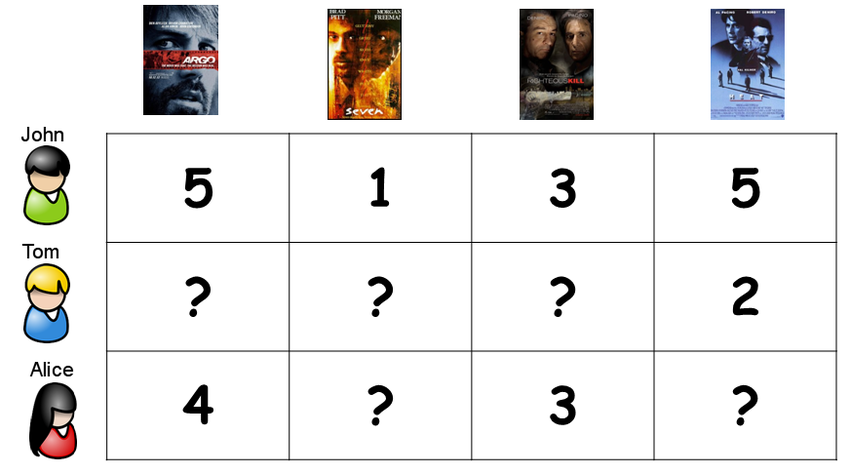


## Transforming the data to the desired format

In [14]:
dummies = pd.get_dummies(small_data['movie_id'], prefix = 'movie')
temp = pd.concat([small_data[['user_id', 'rating']], dummies], axis = 1)

In [15]:
del dummies, result, sim, movies, ratings, users, genres, tfidf_matrix

In [ ]:
for i in temp.columns.difference(['user_id', 'rating']):
    temp[i] = temp[i] * temp['rating']

In [17]:
temp = temp.drop(columns = ['rating'])

In [18]:
temp = temp.groupby(['user_id']).sum()[temp.columns.difference(['user_id', 'rating'])].reset_index()

In [32]:
small_data[small_data['user_id'] == 22]

,user_id,movie_id,rating
2794,22,3253,4
2653,22,3113,1
2743,22,2792,3
2695,22,1606,3
2716,22,3210,3
2772,22,3174,4
2730,22,1047,4
2602,22,1270,4
2659,22,2174,4
2635,22,3033,4


## Checking to see the working of data transformation

In [33]:
temp[['movie_447', 'movie_1186', 'movie_2622', 'movie_3037', 'movie_2241']][temp['user_id'] == 45]

,movie_447,movie_1186,movie_2622,movie_3037,movie_2241
44,3,4,3,3,3


In [21]:
temp.head()

,user_id,movie_1,movie_10,movie_100,movie_1000,movie_1002,movie_1003,movie_1004,movie_1005,movie_1006,...,movie_99,movie_990,movie_991,movie_992,movie_993,movie_994,movie_996,movie_997,movie_998,movie_999
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Saving the matrix table as temp.csv

In [22]:
temp.to_csv('temp.csv')

## Finding the cosine similarity between the users based on the movie

### Finding the cosine relation between two movies

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

a = temp.iloc[133, :]
a = a[temp.columns.difference(['user_id'])]
b = temp.iloc[22, :]
b = b[temp.columns.difference(['user_id'])]

sim = cosine_similarity([a], [b])
print(sim)

[[0.66431073]]


In [5]:
# for i in range(len(temp1)):  
#     print(i, len(temp1))
#     row = temp1.iloc[i,:][temp1.columns.difference(['user_id'])]
#     row = row[row != 0]
#     avg = row.mean()
#     for j in range(1, 2677):
#         if temp1.iloc[i, j] != 0:
#             temp1.iloc[i, j] = temp1.iloc[i ,j] - avg

## Creating a dataframe with similarities between users

In [6]:
sim = cosine_similarity(temp[temp.columns.difference(['user_id'])], temp[temp.columns.difference(['user_id'])])
sim[:4,:4]

array([[1.        , 0.07877092, 0.        , 0.        ],
       [0.07877092, 1.        , 0.00698026, 0.19224158],
       [0.        , 0.00698026, 1.        , 0.07368761],
       [0.        , 0.19224158, 0.07368761, 1.        ]])

In [7]:
sim = pd.DataFrame(data = sim, columns = temp['user_id'], index = temp['user_id'])

In [8]:
sim.to_csv('sim.csv')

## We can see the movies they have rated for the user a and user b whose cosine similarity we obtained above

In [12]:
a = temp[(temp['user_id'] == 22) | (temp['user_id'] == 3057)]

In [13]:
for i in a.columns:
    if a.iloc[0, :][i] != 0:
        print(a[i])

21        21
3053    3053
Name: Unnamed: 0, dtype: int64
21        22
3053    3057
Name: user_id, dtype: int64
21      3
3053    0
Name: movie_104, dtype: int64
21      4
3053    0
Name: movie_1047, dtype: int64
21      3
3053    0
Name: movie_1073, dtype: int64
21      4
3053    0
Name: movie_1247, dtype: int64
21      4
3053    0
Name: movie_1253, dtype: int64
21      4
3053    0
Name: movie_1261, dtype: int64
21      4
3053    0
Name: movie_1270, dtype: int64
21      4
3053    0
Name: movie_1358, dtype: int64
21      2
3053    0
Name: movie_1429, dtype: int64
21      1
3053    0
Name: movie_1438, dtype: int64
21      3
3053    0
Name: movie_1606, dtype: int64
21      1
3053    0
Name: movie_1608, dtype: int64
21      3
3053    0
Name: movie_1653, dtype: int64
21      4
3053    0
Name: movie_1732, dtype: int64
21      1
3053    0
Name: movie_1876, dtype: int64
21      4
3053    0
Name: movie_2011, dtype: int64
21      4
3053    0
Name: movie_2046, dtype: int64
21      4
3053    0
Nam

# Example of user based collaborative similarity for user 22

In [14]:
result = sim[22].reset_index()

In [15]:
top_5_users = result.nlargest(n = 5, keep = 'first', columns = 22)

In [16]:
top_5_users

,user_id,22
21,22,1.000000
351,352,0.683891
203,204,0.682388
69,70,0.681391
198,199,0.681264
